<a href="https://colab.research.google.com/github/joaozz21/Projetos_de_Estudo/blob/main/An%C3%A1lises%20sobre%20taxas%20de%20analfabetismo%20%7C%20taxas%20de%20infla%C3%A7%C3%A3o%20%7C%20etc%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#João Henrique Alves de Oliveira Figueiredo

**1)** Para este item você deverá usar o arquivo com a [porcentagem da população brasileira que é analfabeta, dividida por unidade da federação, de 1981 a 2014 (analfabetismo.csv, encontrado na pasta aula5/dados)](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/analfabetismo.csv) (dados disponibilizados por Ipeadata).

   + Faça um gráfico da taxa de analfabetismo em São Paulo em função do tempo (anos).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds= pd.read_csv("https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/analfabetismo.csv")

plt.figure()
plt.plot(ds['Ano'], ds['São Paulo'])
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Ano')
plt.ylabel('Taxa de analfabetismo %')
plt.title('Taxa de analfabetismo em São Paulo em função do tempo')
plt.show()

**2)** Para este item você deverá usar o arquivo [com todos os resultados do campeonato Brasileiro de futebol de 2018 (tabelaBrasileirao2018.csv encontrado na pasta aula5/dados)](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv) (dados obtidos [desta](<https://pt.wikipedia.org/wiki/Resultados_do_Campeonato_Brasileiro_de_Futebol_de_2018_-_S%C3%A9rie_A_(primeiro_turno)>) e [desta](<https://pt.wikipedia.org/wiki/Resultados_do_Campeonato_Brasileiro_de_Futebol_de_2018_-_S%C3%A9rie_A_(segundo_turno)>) página da Wikipedia).

- Calcule (e mostre o resultado) a porcentagem de jogos que o time da casa (mandante) ganhou o jogo.

- Calcule (e mostre o resultado) a porcentagem de jogos que o time da casa (mandante) não perdeu o jogo.

Como o nome da coluna tem espaço em branco, ao usar o query,  colocar o nome da coluna entre ``.

In [ ]:
ds1= pd.read_csv("https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv")

placarMandante = ds1['Placar do Mandante']
placarVisitante = ds1['Placar do Visitante']
numeroJogos = ds1.shape[0]

mandanteGanhou = 0
mandanteNaoPerdeu = 0

for i in np.arange(0, numeroJogos):
  if placarMandante[i] > placarVisitante[i]:
    mandanteGanhou+=1

print(f'A porcentagem de jogos que o time da casa ganhou o jogo foi de: {round((mandanteGanhou/numeroJogos)*100,1)}%')

for i in np.arange(0, numeroJogos):
  if placarMandante[i] >= placarVisitante[i]:
    mandanteNaoPerdeu+=1

print(f'A porcentagem de jogos que o time da casa não perdeu o jogo foi de: {round((mandanteNaoPerdeu/numeroJogos)*100,1)}%')



**3)** Para este item você deverá usar o arquivo com a [taxa de inflação mensal (IGP-DI) no Brasil de fevereiro de 1944 a junho de 2024](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/inflacaoMensal.csv) (dados disponibilizados por Ipeadata).

- Faça um gráfico da taxa de inflação mensal em função do tempo.
- Mostre em que mês e ano e qual foi a maior taxa de inflação mensal medida neste período (fevereiro de 1944 a junho de 2024).

Dica: para fazer o gráfico, note que um mês corresponde a um doze avos de ano. Para facilitar a criação do gráfico você pode criar uma outra coluna que corresponda ao ano adicionado da fração correspondente ao mês.

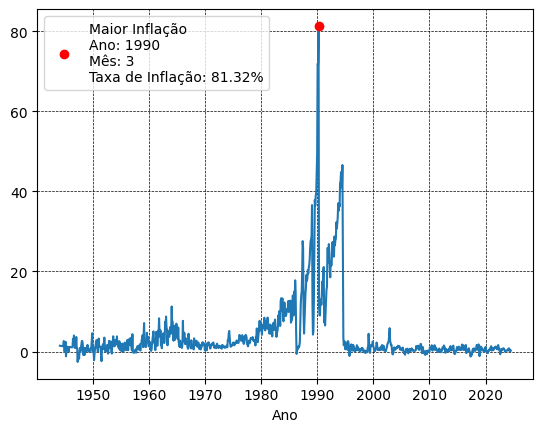

In [79]:
ds2= pd.read_csv("https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/inflacaoMensal.csv")

ds2['Tempo'] = ds2['Ano'] + ds2['Mês']/12
x = ds2['Tempo']
y = ds2['Inflação']
maiorInflaçaoX = x[y==max(y)]
maiorInflaçaoY = max(y)

plt.figure()
plt.plot(x,y)
plt.plot(
        maiorInflaçaoX,maiorInflaçaoY,'ro',label=
        f'Maior Inflação\nAno: {round(maiorInflaçaoX.values[0])}\nMês: {ds2["Mês"][y==max(y)].values[0]} \nTaxa de Inflação: {maiorInflaçaoY}%'
        )
plt.legend()
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Ano')
plt.ylabel('')
plt.title('')
plt.show()

**3)** Para este item você pode usar [esse histórico de visualização do Netflix](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/netflix.csv) ou, se você tiver acesso ao Netflix, usar o seu [histórico](https://www.netflix.com/viewingactivity) (após entrar com a sua senha, role até o final da página e clique em "Baixar tudo").

   + Mostre quais são os 10 programas mais vistos.
   + Em qual mês do ano foi assistido mais programas?

In [155]:
ds3= pd.read_csv("https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/netflix.csv")

ds3['Categoria'] = 'Filme'
ds3.loc[ds3['Title'].str.contains(": Temporada|: Stranger|: Parte"),'Categoria'] = 'Série'
ds3['Programa'] = ds3['Title']
ds3[['Programa','Episódio']] = ds3[ds3['Categoria']=='Série']['Title'].str.split(pat = ': Temporada|: Stranger Things|: Parte', expand = True, n = 1)
ds3.loc[ds3['Categoria']=='Filme', 'Programa'] = ds3.loc[ds3['Categoria']=='Filme', 'Title']
ds3 = ds3.drop(columns = 'Title')
ds3['Count'] = 1

top10 = ds3.groupby('Programa').count().sort_values('Count',ascending = False).head(10)
print('Os 10 programas mais vistos são:')
for i in top10.index:
  print(f'{i} | visto {top10.loc[i, "Count"]} vezes')


ds3['Mês'] = ds3['Date'].str.split(pat = '/', expand=True)[1]
mesMaisAssistido = ds3.groupby('Mês').count().sort_values('Count',ascending = False)
print(
    f'\nO Mês do ano em que programas foram mais assistidos foi o mês {mesMaisAssistido.index.values[0]}, com {mesMaisAssistido.loc["03","Count"]} programas assistidos'
    )





Os 10 programas mais vistos são:
Jornada nas Estrelas: A nova geração | visto 67 vezes
Star Trek: Enterprise | visto 63 vezes
The Crown | visto 60 vezes
Jornada nas Estrelas: Deep Space Nine | visto 56 vezes
Aggretsuko | visto 48 vezes
Jornada nas estrelas | visto 45 vezes
Star Trek: Discovery | visto 42 vezes
Cobra Kai | visto 32 vezes
Downton Abbey | visto 25 vezes
Era uma vez | visto 23 vezes

O Mês do ano em que programas foram mais assistidos foi o mês 03, com 111 programas assistidos


In [145]:
top10


,Date,Categoria,Episódio,Count
Programa,,,,
Jornada nas Estrelas: A nova geração,67,67,67,67
Star Trek: Enterprise,63,63,63,63
The Crown,60,60,60,60
Jornada nas Estrelas: Deep Space Nine,56,56,56,56
Aggretsuko,48,48,48,48
Jornada nas estrelas,45,45,45,45
Star Trek: Discovery,42,42,42,42
Cobra Kai,32,32,32,32
Downton Abbey,25,25,25,25


In [156]:
mesMaisAssistido

,Date,Categoria,Programa,Episódio,Count
Mês,,,,,
03,111,111,111,92,111
06,109,109,109,75,109
12,107,107,107,91,107
02,99,99,99,76,99
01,98,98,98,82,98
04,93,93,93,83,93
05,90,90,90,68,90
11,88,88,88,71,88
07,77,77,77,64,77
